<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/KOL1_Ethnicity_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [1]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 155MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#Read the dataset

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/VNP/Ethnicity.csv')

In [5]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


#Visualization

<Axes: >

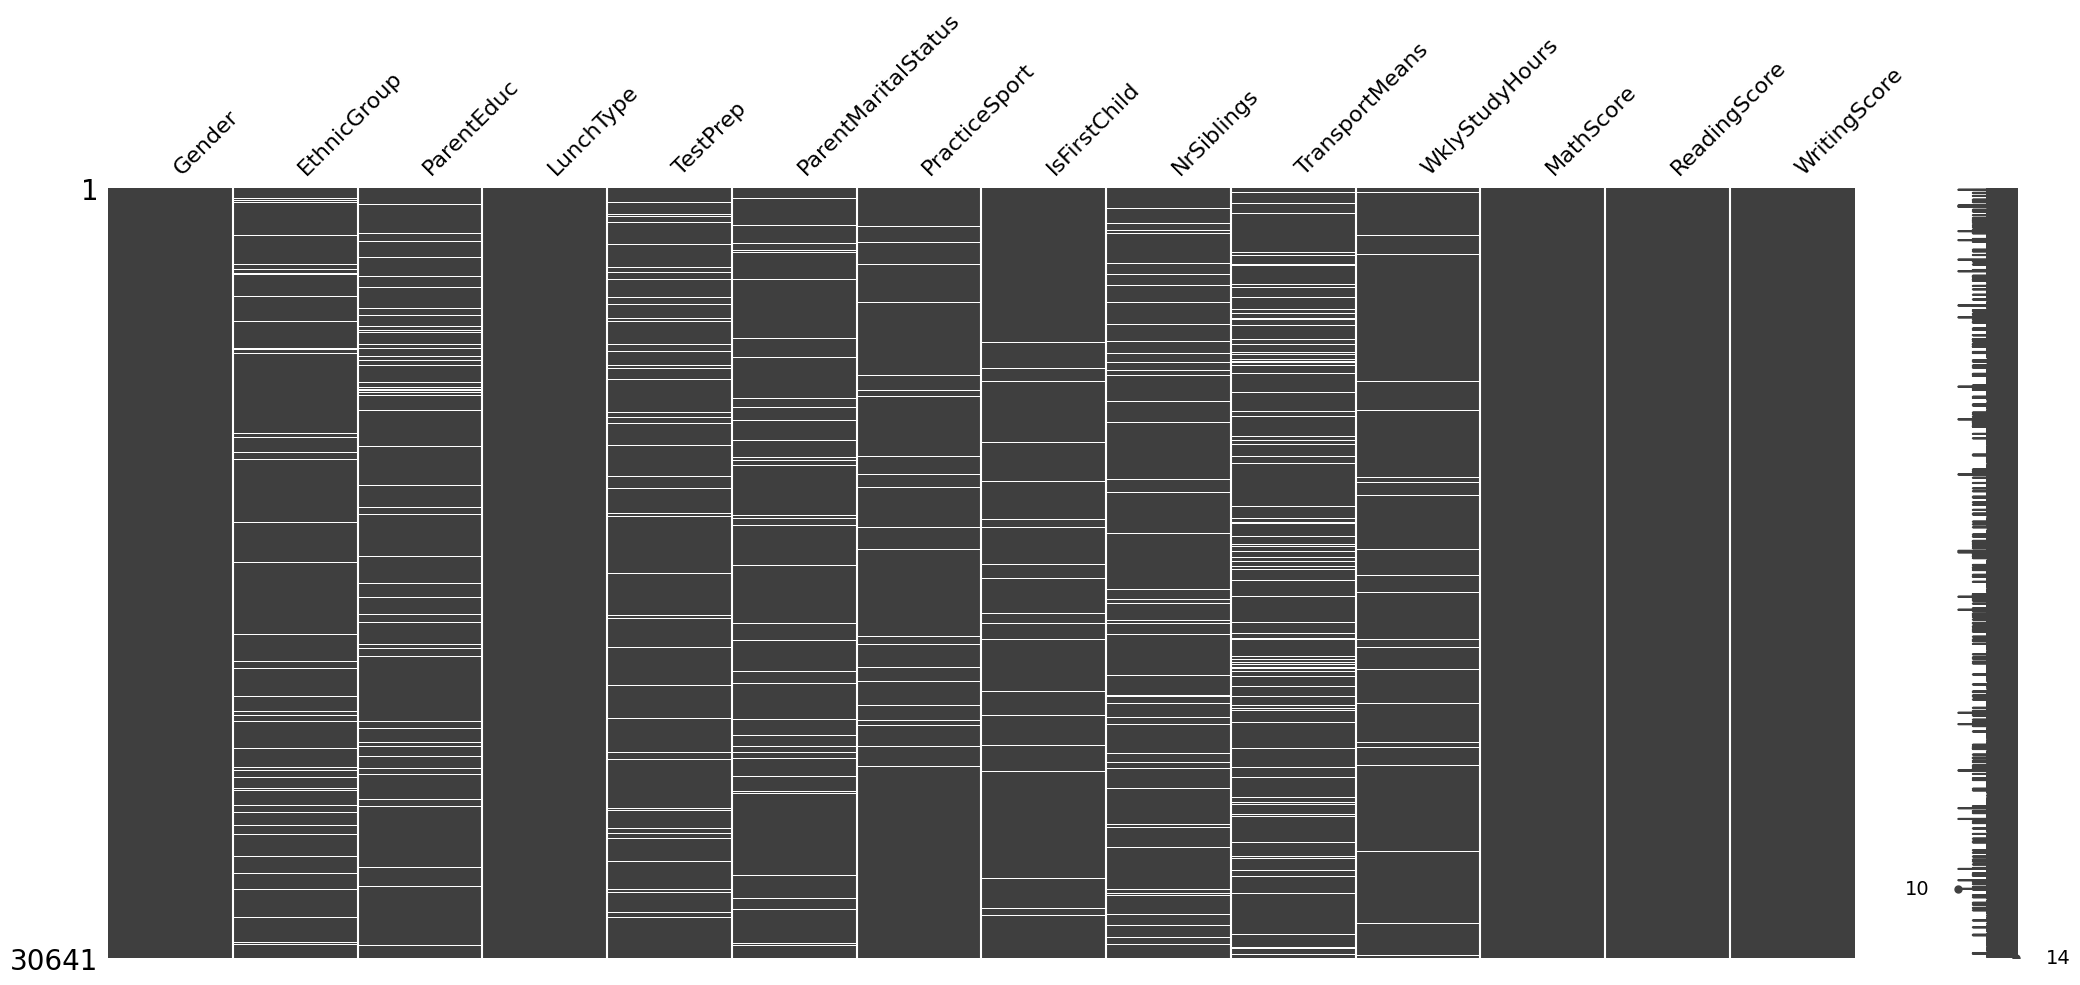

In [9]:
msno.matrix(df)

<Axes: >

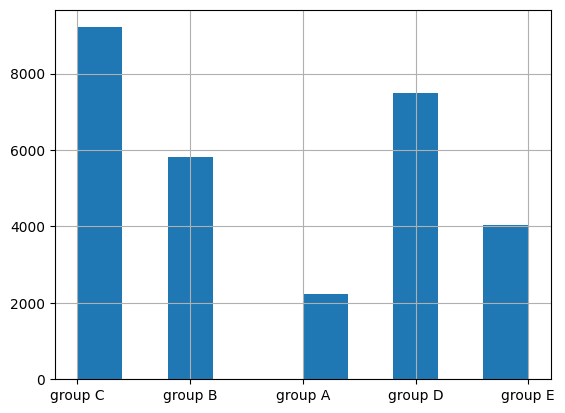

In [10]:
df['EthnicGroup'].hist()

<Axes: >

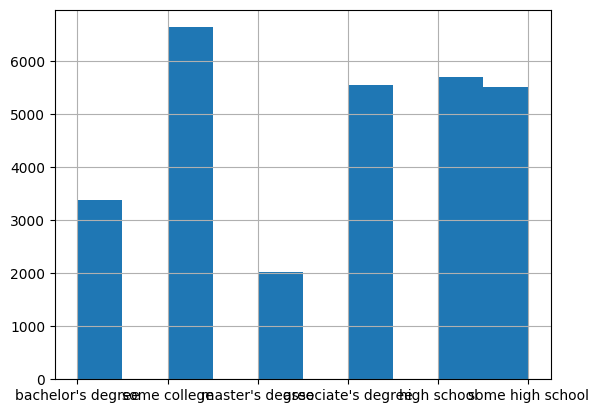

In [11]:
df['ParentEduc'].hist()

<Axes: >

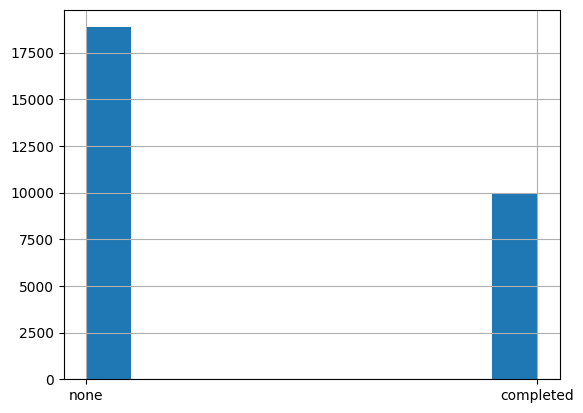

In [12]:
df['TestPrep'].hist()

<Axes: >

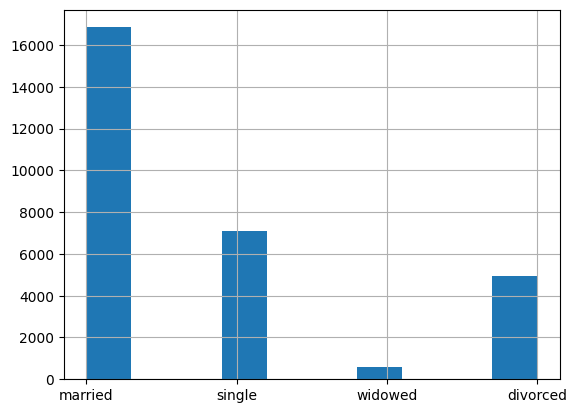

In [13]:
df['ParentMaritalStatus'].hist()

<Axes: >

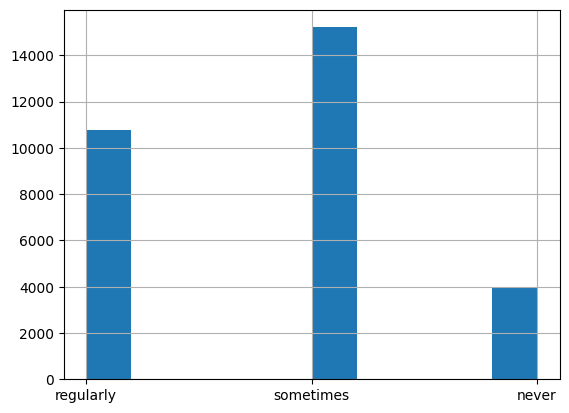

In [14]:
df['PracticeSport'].hist()

<Axes: >

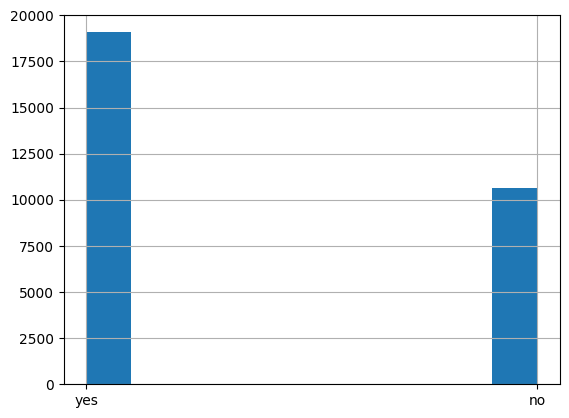

In [15]:
df['IsFirstChild'].hist()

<Axes: >

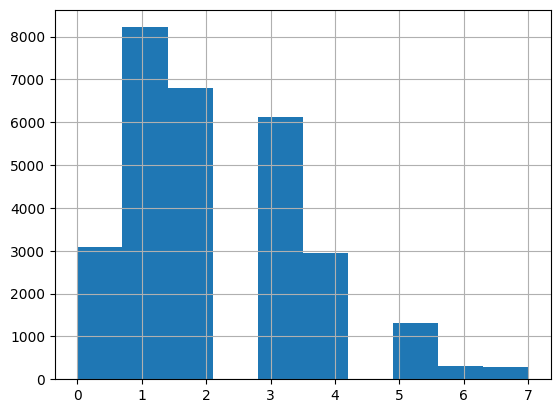

In [16]:
df['NrSiblings'].hist()

<Axes: >

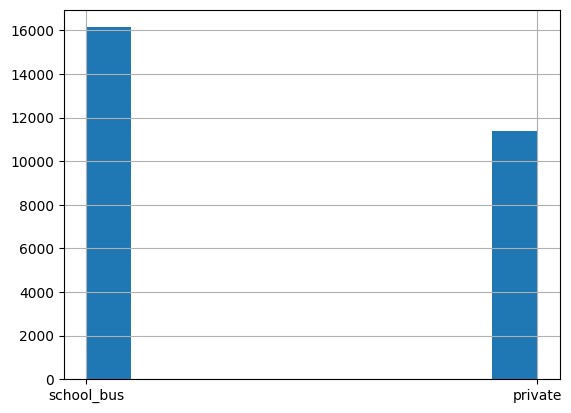

In [17]:
df['TransportMeans'].hist()

<Axes: >

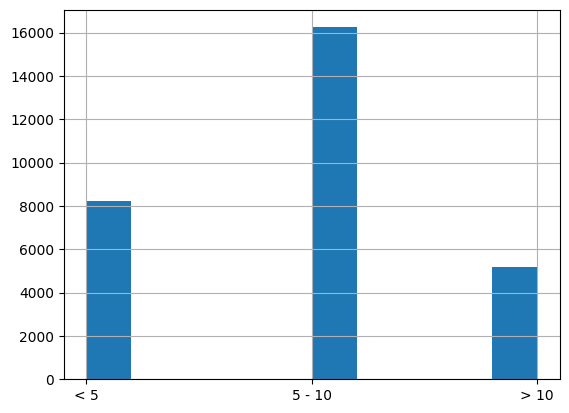

In [18]:
df['WklyStudyHours'].hist()

#Missing Values & Textual data

In [19]:
categorical_features = df[['Gender','EthnicGroup','ParentEduc','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','TransportMeans','WklyStudyHours']]

In [20]:
categorical_features

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,school_bus,< 5
1,female,group C,some college,standard,NaN,married,sometimes,yes,NaN,5 - 10
2,female,group B,master's degree,standard,none,single,sometimes,yes,school_bus,< 5
3,male,group A,associate's degree,free/reduced,none,married,never,no,NaN,5 - 10
4,male,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,school_bus,5 - 10
30637,male,group E,high school,standard,none,single,regularly,no,private,5 - 10
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,private,5 - 10
30639,female,group D,associate's degree,standard,completed,married,regularly,no,school_bus,5 - 10


In [21]:
# for col in categorical_features:
#   imputer = SimpleImputer(strategy = 'most_frequent')
#   df[col] = imputer.fit_transform(df[col])[0]

df = df.ffill()

In [22]:
df = df.dropna(axis=0)

In [23]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [24]:
encoder = LabelEncoder()

for cat in categorical_features:
  df[cat] = encoder.fit_transform(df[cat])

In [25]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
1,0,2,4,1,1,1,2,1,0.0,1,0,69,90,88
2,0,1,3,1,1,2,2,1,4.0,1,1,87,93,91
3,1,0,0,0,1,1,0,0,1.0,1,0,45,56,42
4,1,2,4,1,1,1,2,1,0.0,1,0,76,78,75
5,0,1,0,1,1,1,1,1,1.0,1,0,73,84,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,2,1,1,2,2,0,2.0,1,0,59,61,65
30637,1,4,2,1,1,2,1,0,1.0,0,0,58,53,51
30638,0,4,2,0,0,1,2,0,1.0,0,0,61,70,67
30639,0,3,0,1,0,1,1,0,3.0,1,0,82,90,93


In [26]:
#sns.pairplot(df)

#Train - test split of the dataset (80:20 ratio)

In [27]:
features = df[['MathScore','ReadingScore','TestPrep','ParentEduc','ParentMaritalStatus', 'NrSiblings','WklyStudyHours']]

In [34]:
X, Y = df.drop(columns=['EthnicGroup']), df['EthnicGroup']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Model training (Use KNN, Logistic regression or Linear regression)

In [36]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
Y_pred = model.predict(X_test)

#Model evaluation

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       504
           1       0.00      0.00      0.00      1261
           2       0.35      0.69      0.46      1927
           3       0.38      0.38      0.38      1603
           4       0.41      0.34      0.37       833

    accuracy                           0.36      6128
   macro avg       0.23      0.28      0.24      6128
weighted avg       0.26      0.36      0.30      6128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
